In [1]:
# import the important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset

df = pd.read_csv(r'C:\Mahesh\Datasets\iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# information of the datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# checking the null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
## performing encoding 

from sklearn.preprocessing import LabelEncoder

#intialize
le = LabelEncoder()

df['species'] = le.fit_transform(df.species)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.species.unique()

array([0, 1, 2])

In [11]:
# spliting the data into dependent and independent features

x = df.drop('species',axis=1) # independent features

y = df['species'] # dependent features

In [12]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [14]:
# train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [15]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [16]:
# decision tree

from sklearn.tree import DecisionTreeClassifier,plot_tree

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

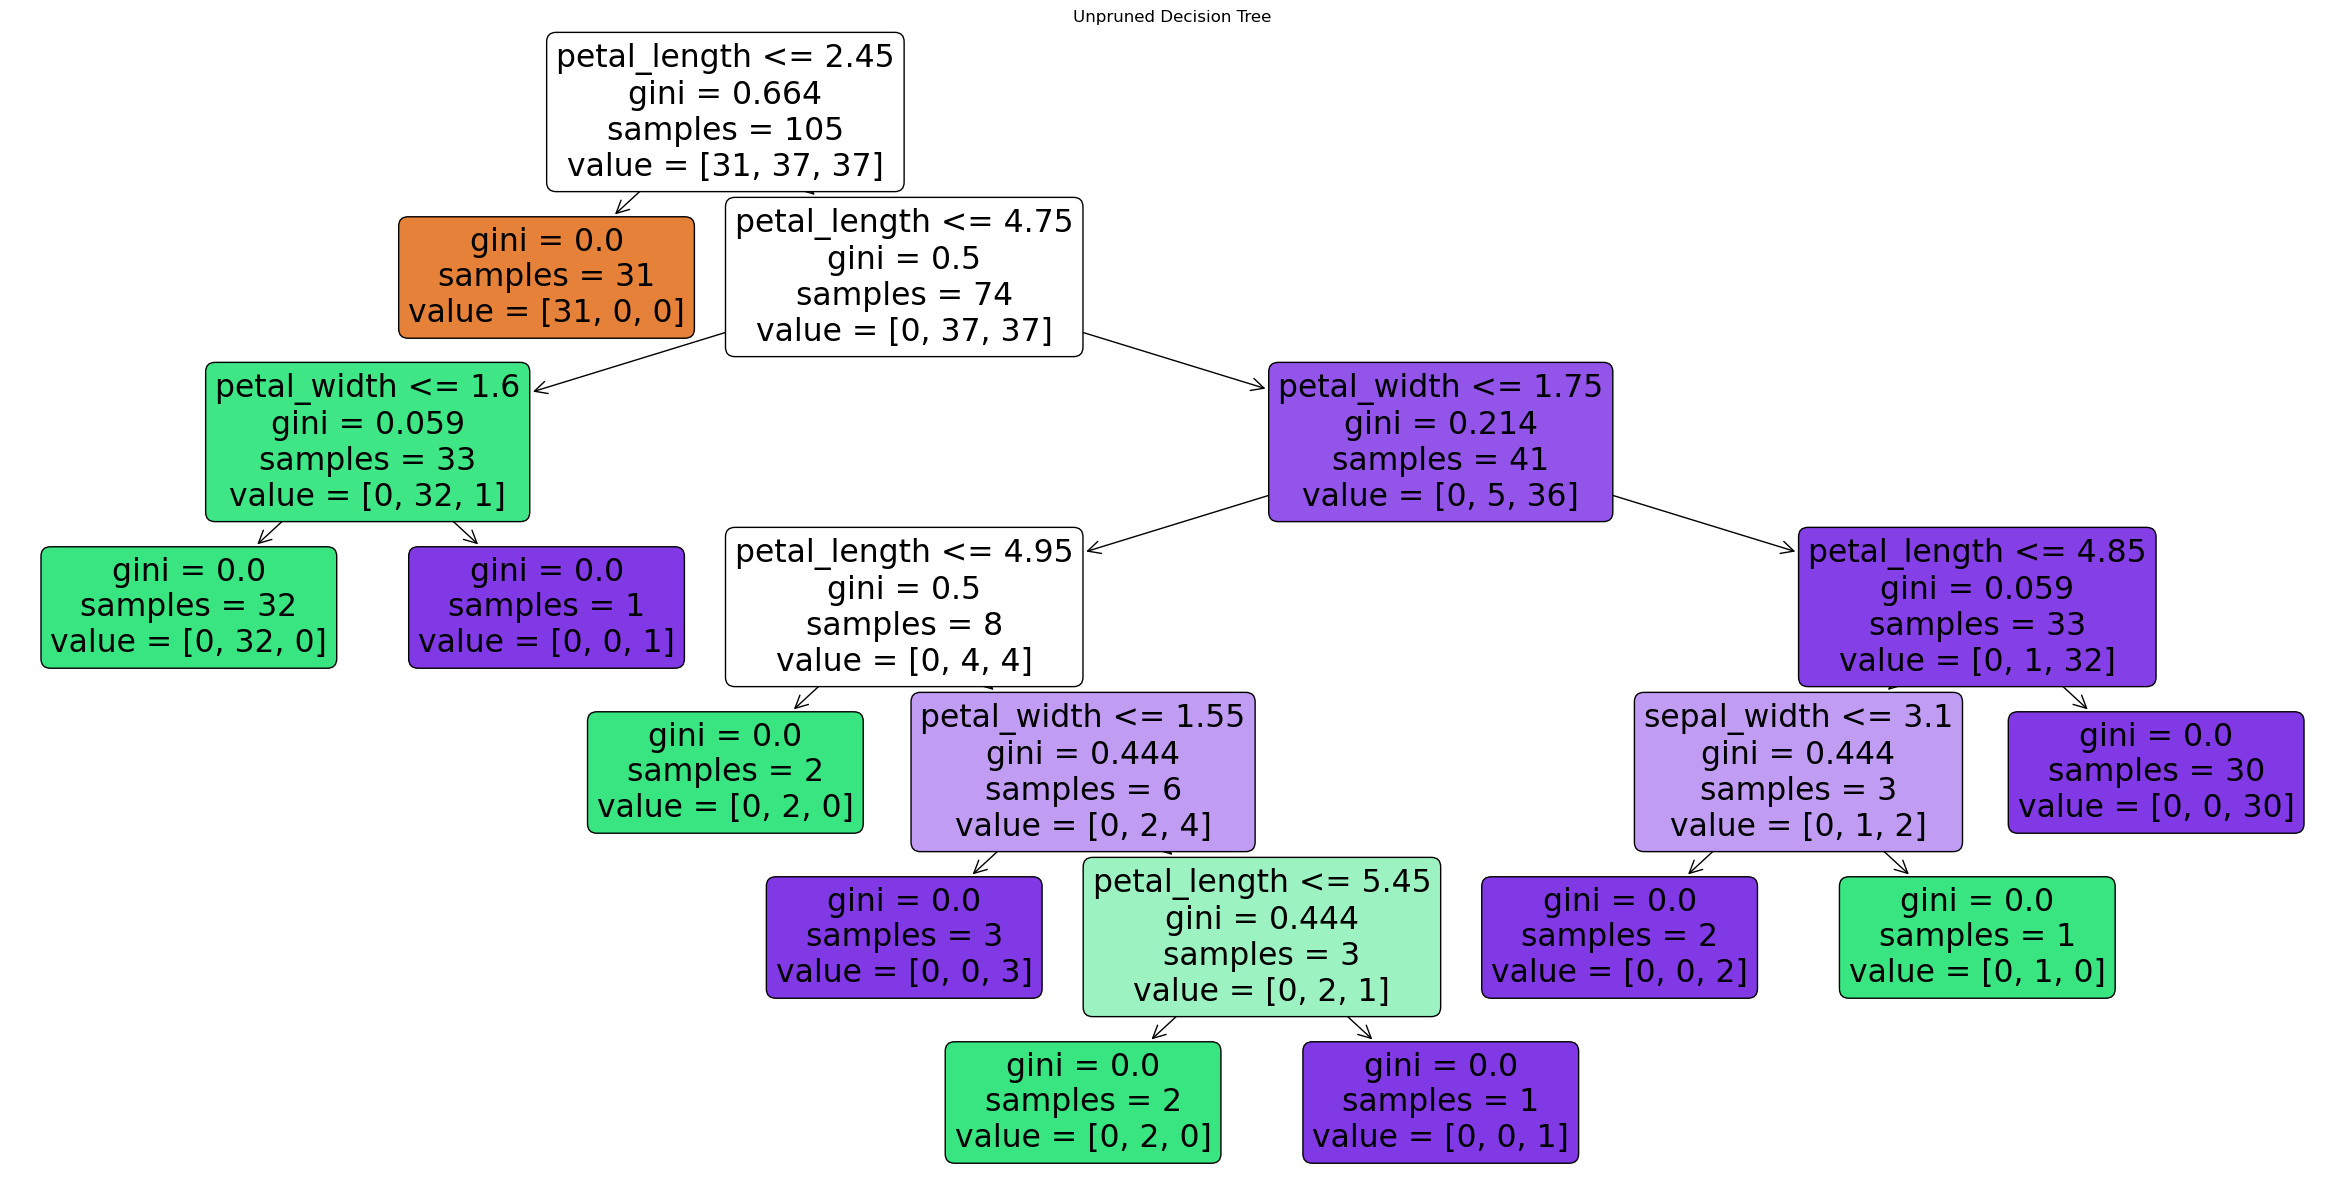

In [18]:
plt.figure(figsize=(30,15))

plot_tree(dt_model,feature_names=x.columns,filled= True,rounded= True)

plt.title("Unpruned Decision Tree")

plt.show()

In [19]:
# y_pred

y_pred_test= dt_model.predict(x_test)
y_pred_train = dt_model.predict(x_train)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
print(f'Training Accuracy is {accuracy_score(y_train, y_pred_train)}')
print(f'Testing Accuracy is {accuracy_score(y_test, y_pred_test)}')

Training Accuracy is 1.0
Testing Accuracy is 1.0


In [22]:
y_train

81     1
133    2
137    2
75     1
109    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 105, dtype: int32

In [23]:
y_pred_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [24]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: species, dtype: int32

In [25]:
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [26]:
print(confusion_matrix(y_test,y_pred_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [27]:
parameters = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6,7]
}

In [28]:
# Grid search CV

from sklearn.model_selection import GridSearchCV

In [29]:
treemodel= DecisionTreeClassifier()

gscv = GridSearchCV(treemodel,param_grid=parameters,cv= 5,scoring='accuracy')

gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [30]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

In [31]:
treemodel2 = DecisionTreeClassifier(criterion= 'entropy',max_depth= 4,splitter='random')



In [32]:
treemodel2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [33]:
y_pred2 = treemodel2.predict(x_test)

In [34]:
print('Accuracy Score :',accuracy_score(y_test,y_pred2))

Accuracy Score : 0.9777777777777777


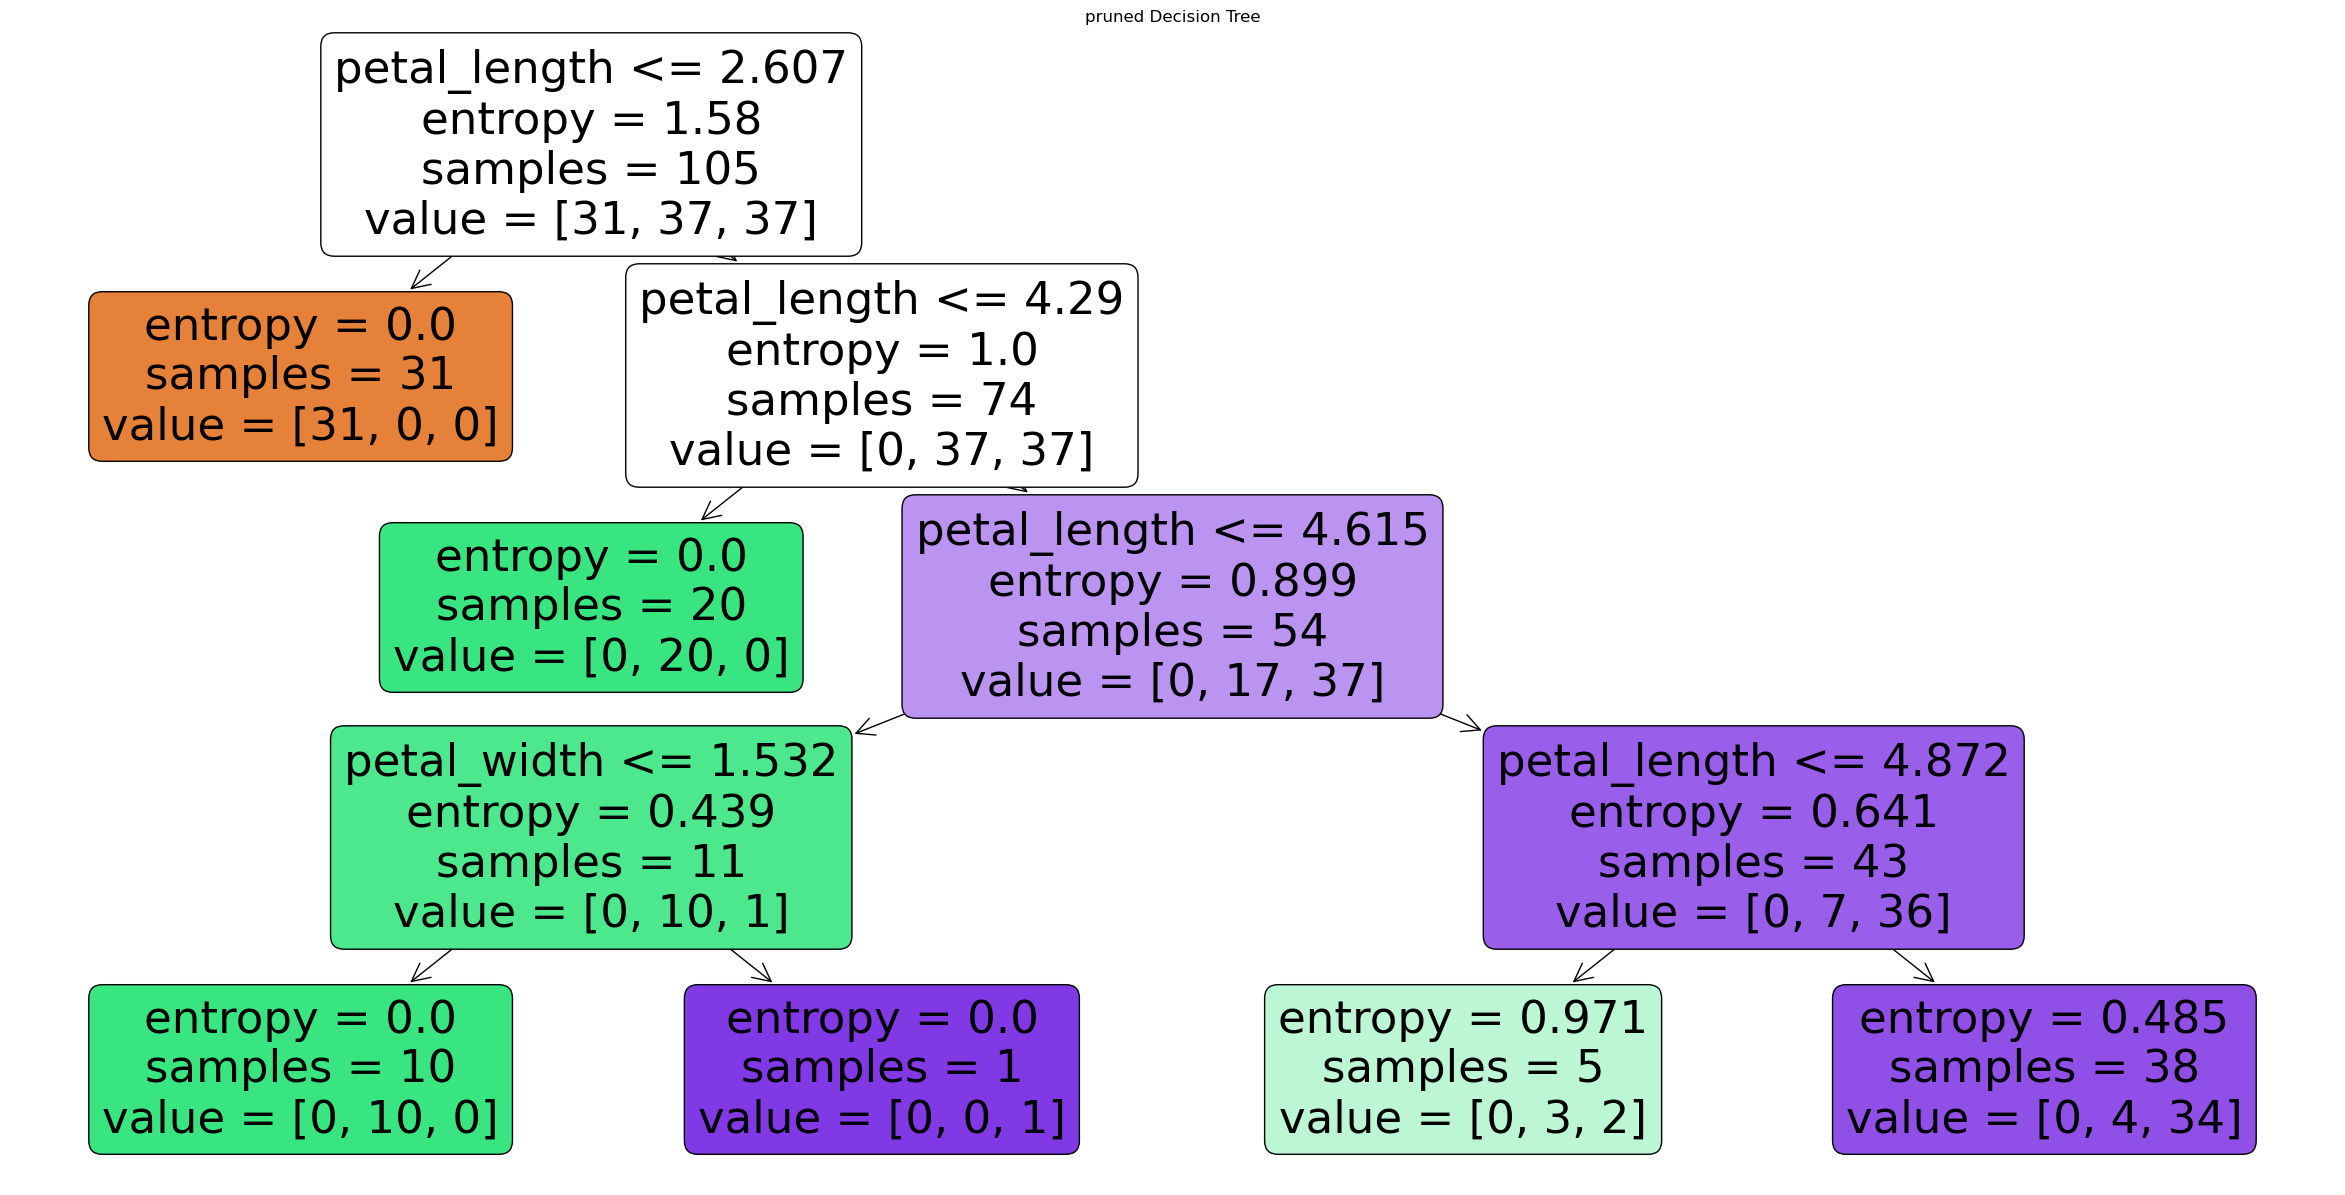

In [35]:
plt.figure(figsize=(30,15))

plot_tree(treemodel2,feature_names=x.columns,filled= True,rounded= True)

plt.title("pruned Decision Tree")

plt.show()

In [36]:
# randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

In [52]:
rscv = RandomizedSearchCV(treemodel2,param_distributions=parameters,cv=5,n_iter=25,scoring='accuracy')

In [53]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4,
                                                    splitter='random'),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [54]:
rscv.best_params_

{'splitter': 'random', 'max_depth': 5, 'criterion': 'gini'}

In [59]:
treemodel3 = DecisionTreeClassifier(splitter='random',max_depth=5,criterion='log_loss')

treemodel3.fit(x_train,y_train)



DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')

In [ ]:
y_pred3 = treemodel3.predict(x_test)

In [56]:
print('Accuracy score',accuracy_score(y_test,y_pred3))

Accuracy score 0.9777777777777777
